In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import re
import statsmodels.formula.api as smf

# The Data

In [2]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Since, this is a classification problem. Let us start with the basic assumption of linearity. Even if we are wrong it helps us 
derive insights out of the features.

# Baseline

In [3]:
# The baseline will be the fraction of the response that occurs the most.
print (train["Survived"]==0).sum()
print (train["Survived"]==1).sum()

549
342


In [4]:
#More deaths than survival
print float((train["Survived"]==0).sum())/train.shape[0]

0.616161616162


In [5]:
#Sex
train["Sex"]=train["Sex"].map({'female':0,'male':1})
formula='Survived ~ Sex'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                  0.2266
Time:                        12:26:05   Log-Likelihood:                -458.90
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.020e-60
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0566      0.129      8.191      0.000         0.804     1.309
Sex           -2.5137      0.

The Pseudo-R squared value is fine. And the p-values are signigicant. However this proves nothing at this point except the variable Sex is related to the response in the absence of other predictors.

In [6]:
#Pclass
formula='Survived ~ Pclass'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.608531
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                 0.08617
Time:                        12:26:06   Log-Likelihood:                -542.20
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 4.885e-24
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.4468      0.207      6.975      0.000         1.040     1.853
Pclass        -0.8501      0.

Again we find the coefficients are significant

In [7]:
#Age
#Missing values
train.loc[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",1,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",0,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",1,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",1,NaN,0,0,349253,7.8958,NaN,C


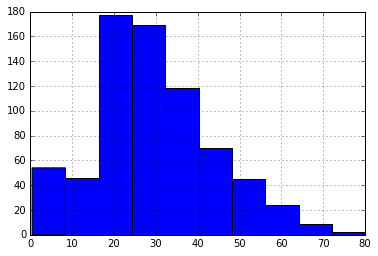

In [8]:
#Since we do not have a lot of data, missing values cannot be discarded. Hence let's look at the distribution.
train["Age"].hist()

In [9]:
#Using the median value for these missing values seems like a decent option
train.loc[train["Age"].isnull(),"Age"]=train["Age"].median()

In [10]:
formula='Survived ~ Age'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.663788
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                0.003189
Time:                        12:26:10   Log-Likelihood:                -591.44
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                   0.05173
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1702      0.170     -1.000      0.317        -0.504     0.164
Age           -0.0104      0.

Coefficient does'nt seem so significant.

In [11]:
#Sibsp
formula='Survived ~ SibSp'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.665272
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:               0.0009611
Time:                        12:26:10   Log-Likelihood:                -592.76
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                    0.2856
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.4382      0.076     -5.744      0.000        -0.588    -0.289
SibSp         -0.0686      0.

Again, not so important.

In [12]:
# Parch
formula='Survived ~ Parch'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.662650
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                0.004899
Time:                        12:26:11   Log-Likelihood:                -590.42
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                   0.01590
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5531      0.077     -7.192      0.000        -0.704    -0.402
Parch          0.2033      0.

In [13]:
formula='Survived ~ Fare'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.627143
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                 0.05822
Time:                        12:26:12   Log-Likelihood:                -558.78
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 9.427e-17
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.9413      0.095     -9.895      0.000        -1.128    -0.755
Fare           0.0152      0.

The coefficients seem significant.

In [14]:
#Embarked
train.loc[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


In [15]:
train["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [16]:
#train.loc[train["Embarked"].isnull(),"Embarked"]='S'
train["Embarked"]=train["Embarked"].map({None:0,'C':1,'S':2,'Q':3})


In [17]:
formula='Survived ~ Embarked'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.656745
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                 0.01377
Time:                        12:26:14   Log-Likelihood:                -585.16
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 5.308e-05
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5398      0.262      2.063      0.039         0.027     1.053
Embarked      -0.5396      0.

Significant.

Parch, Embarked and Fare dont explain much variance.

# Feature Engineering

In [18]:
#Let's See what we can get out of the name
titles=[]
surnames=[]
for every in train.Name:
    surnames.append(every.split(',')[0])
    name=every.split(',')[1]
    tits=name.split()
    titles.append(tits[0][:-1])
    
    
    
train["Title"]=titles
train["Surname"]=surnames
train["IsMother"]=np.zeros(train.shape[0])
train.loc[((train["Title"]=="Mrs")&(train["Parch"]>0)),"IsMother"]=1


In [19]:
formula='Survived ~ IsMother'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.650850
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                 0.02262
Time:                        12:26:17   Log-Likelihood:                -579.91
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.210e-07
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5681      0.072     -7.888      0.000        -0.709    -0.427
IsMother       1.4844      0.

In [20]:
train["IsChild"]=np.zeros(train.shape[0])
train.loc[train["Age"]<=18,"IsChild"]=1

train["IsOld"]=np.zeros(train.shape[0])
train.loc[train["Age"]>=60,"IsOld"]=1

In [21]:
formula='Survived ~ IsChild'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.660433
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                0.008227
Time:                        12:26:18   Log-Likelihood:                -588.45
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                  0.001781
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5680      0.076     -7.484      0.000        -0.717    -0.419
IsChild        0.5824      0.

In [22]:
train["IsFamily"]=np.zeros(train.shape[0])
train.loc[(train["SibSp"]+train["Parch"]>0),"IsFamily"]=1


In [23]:
formula='Survived ~ IsFamily'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.645319
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                 0.03092
Time:                        12:26:20   Log-Likelihood:                -574.98
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.381e-09
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.8305      0.094     -8.849      0.000        -1.014    -0.647
IsFamily       0.8531      0.

In [24]:
train["IsFirstClass"]=np.zeros(train.shape[0])
train.loc[(train["Pclass"]==1),"IsFirstClass"]=1

In [25]:
formula='Survived ~ IsFirstClass'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.625851
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                 0.06016
Time:                        12:26:20   Log-Likelihood:                -557.63
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.932e-17
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -0.8227      0.084     -9.843      0.000        -0.987    -0.659
IsFirstClass     1.3534

In [26]:
#HashedTitle
hashedtitle=[]
for i in range(train.shape[0]):
    ht=ord(train['Title'][i][0])+len(train['Title'][i])+train['Sex'][i]
    hashedtitle.append(ht)
train["hashedTitle"]=hashedtitle
    
    


In [27]:
formula='Survived ~ hashedTitle'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.656166
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                 0.01464
Time:                        12:26:21   Log-Likelihood:                -584.64
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 3.079e-05
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     -17.3918      4.690     -3.708      0.000       -26.584    -8.200
hashedTitle     0.2104    

In [28]:
ticket=[]
for every in train['Ticket']:
    
    deptName = re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", every)
    if len(deptName) == 0:
        deptName = 'none'
    deptCode = ord(deptName[0]) + len(deptName)
    ticket.append(deptCode)
train["Dept"]=ticket

In [29]:
formula='Survived ~ Dept'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.665794
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:               0.0001767
Time:                        12:26:22   Log-Likelihood:                -593.22
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                    0.6470
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.6884      0.476     -1.447      0.148        -1.621     0.244
Dept           0.0020      0.

In [30]:
train["FamilySize"]=train["SibSp"]+train["Parch"]+1
train["Familyid"]=train["FamilySize"].astype(str)+train["Surname"]
train.loc[train["FamilySize"]<=2,"Familyid"]="Small"
formula='Survived ~ FamilySize'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()

Optimization terminated successfully.
         Current function value: 0.665774
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:               0.0002065
Time:                        12:26:23   Log-Likelihood:                -593.21
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                    0.6206
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5134      0.106     -4.824      0.000        -0.722    -0.305
FamilySize     0.0210      0.

In [31]:
train["IsThirdClass"]=np.zeros(train.shape[0])
train.loc[train["Pclass"]==3,"IsThirdClass"]=1
train["IsSecondClass"]=np.zeros(train.shape[0])
train.loc[train["Pclass"]==2,"IsSecondClass"]=1
train["EmbarkedatS"]=np.zeros(train.shape[0])
train.loc[train["Embarked"]==2,"EmbarkedatS"]=1
train["EmbarkedatP"]=np.zeros(train.shape[0])
train.loc[train["Embarked"]==1,"EmbarkedatP"]=1
train["EmbarkedatQ"]=np.zeros(train.shape[0])
train.loc[train["Embarked"]==3,"EmbarkedatQ"]=1
train["Age*Pclass"]=train["Age"]*train["Pclass"]

In [32]:
train.Cabin.fillna('0', inplace=True)
train.loc[train.Cabin.str[0] == 'A', 'Cabin'] = 1
train.loc[train.Cabin.str[0] == 'B', 'Cabin'] = 2
train.loc[train.Cabin.str[0] == 'C', 'Cabin'] = 3
train.loc[train.Cabin.str[0] == 'D', 'Cabin'] = 4
train.loc[train.Cabin.str[0] == 'E', 'Cabin'] = 5
train.loc[train.Cabin.str[0] == 'F', 'Cabin'] = 6
train.loc[train.Cabin.str[0] == 'G', 'Cabin'] = 7
train.loc[train.Cabin.str[0] == 'T', 'Cabin'] = 8


In [33]:
train["TitleSplit"]=train["Title"]
train.loc[((train["TitleSplit"]=="Mme") | (train["TitleSplit"]=="Mlle")),"TitleSplit"]="Mlle"

train.loc[((train["Title"]=="Sir" ) | (train["Title"]=="Don")  | (train["Title"]=="Capt") | (train["Title"]=="Major")),
          "TitleSplit"]="Sir"
train.loc[((train["Title"]=="Dona") | (train["Title"]=="Lady") | (train["Title"]=="th") | (train["Title"]=="Jonkheer")),
          "TrainSplit"]="Lady"

In [34]:
train["FirstClassWomen"]=np.zeros(train.shape[0])
train.loc[((train["IsFirstClass"]==1) & (train["Sex"]==0)),"FirstClassWomen"]=1

In [35]:
#Now, let's fit a linear model to all the variables observed above to see how well the model does in presence of other
#predictors.

formula='Survived ~ Sex+SibSp+Parch+Embarked+Fare+Age+Pclass+IsMother+IsChild+hashedTitle+Dept+IsFirstClass+IsOld+FirstClassWomen'
model=smf.logit(formula,data=train)
results=model.fit()
print results.summary()


Optimization terminated successfully.
         Current function value: 0.432473
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      876
Method:                           MLE   Df Model:                           14
Date:                Sat, 05 Nov 2016   Pseudo R-squ.:                  0.3506
Time:                        12:26:26   Log-Likelihood:                -385.33
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 5.405e-80
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         -12.1750      5.945     -2.048      0.041       -23.826    -0.524
Sex           

In [36]:
#Now let's make some predictions on the available significant predictors predictors
#Splitting the data
train["TitleSplit"]=pd.get_dummies(train["TitleSplit"])
train["Familyid"]=pd.get_dummies(train["Familyid"])
from sklearn.cross_validation import train_test_split
columns=['Sex',"IsMother","IsChild","IsFamily","hashedTitle","Dept","IsOld","IsThirdClass","IsFirstClass","EmbarkedatS",
        "EmbarkedatP","EmbarkedatQ","Familyid","TitleSplit"]
itrain,itest,jtrain,jtest=train_test_split(train[columns].values,train["Survived"].values)

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(itrain,jtrain)
lr.score(itest,jtest)

0.77578475336322872

This doesn't tell much. As it is just one train set and one test set. Let's try cross-validation, along with regularization.

In [38]:

from sklearn.cross_validation import StratifiedKFold 
def cv_score(clf,X,Y):
    nFolds=5
    sk=StratifiedKFold(Y,n_folds=nFolds)
    score=0.0
    for train,test in sk:
        xtrain,xtest=X[train],X[test]
        ytrain,ytest=Y[train],Y[test]
        clf.fit(xtrain,ytrain)
        
        score=score+(clf.score(xtest,ytest))
    return float(score)/nFolds

In [39]:
Cs=[0.0001,0.001,0.01,0.1,1,10,100,1000]
max_score=0.0

for C in Cs:
    lr=LogisticRegression(penalty='l2',C=C)
    score=cv_score(lr,itrain,jtrain)
    if score>max_score:
        max_score=score
        best_C=C
print max_score,best_C
    

0.790321121664 0.1


In [40]:
lr=LogisticRegression(penalty='l2',C=0.1)
lr.fit(itrain,jtrain)
lr.score(itest,jtest)

0.79372197309417036

The test set gives a prediction score of 0.7655. We want to improve on that, so let's try a non-linear method such as random
forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
estimators=[100,200,300,400,500,600,700,800,900,1000]
max_score=0.0

for estimator in estimators:
    randfor=RandomForestClassifier(n_estimators=estimator)
    score=cv_score(randfor,itrain,jtrain)
    if score>max_score:
        max_score=score
        best_estimator=estimator
print max_score,best_estimator
    

0.817345092718 300


In [42]:
rf=RandomForestClassifier(n_estimators=best_estimator)
rf.fit(itrain,jtrain)
print rf.score(itrain,jtrain)
print rf.score(itest,jtest)

0.866766467066
0.77130044843


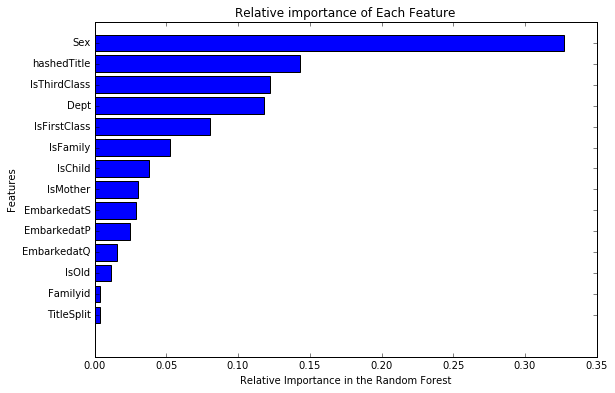

In [183]:
importance_list = rf.feature_importances_
name_list = columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
figure=plt.figure(1,figsize=(9,6))
ax=figure.add_subplot(111)
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [184]:
from sklearn.metrics import precision_recall_curve
nFolds=5
sk=StratifiedKFold(jtrain,n_folds=nFolds)
probs=[0,0,0,0,0]
i=0
for train_inds,test_inds in sk:
    xtrain,xtest=itrain[train_inds],itrain[test_inds]
    ytrain,ytest=jtrain[train_inds],jtrain[test_inds]
    rf.fit(xtrain,ytrain)
    probs[i]=rf.predict_proba(xtest)[:,1]
    i=i+1

In [185]:
#Combining all the predictions from cross_validation
probabilities=[p for preds in probs for p in preds]
precision,recall,thresholds=precision_recall_curve(jtrain,probabilities)

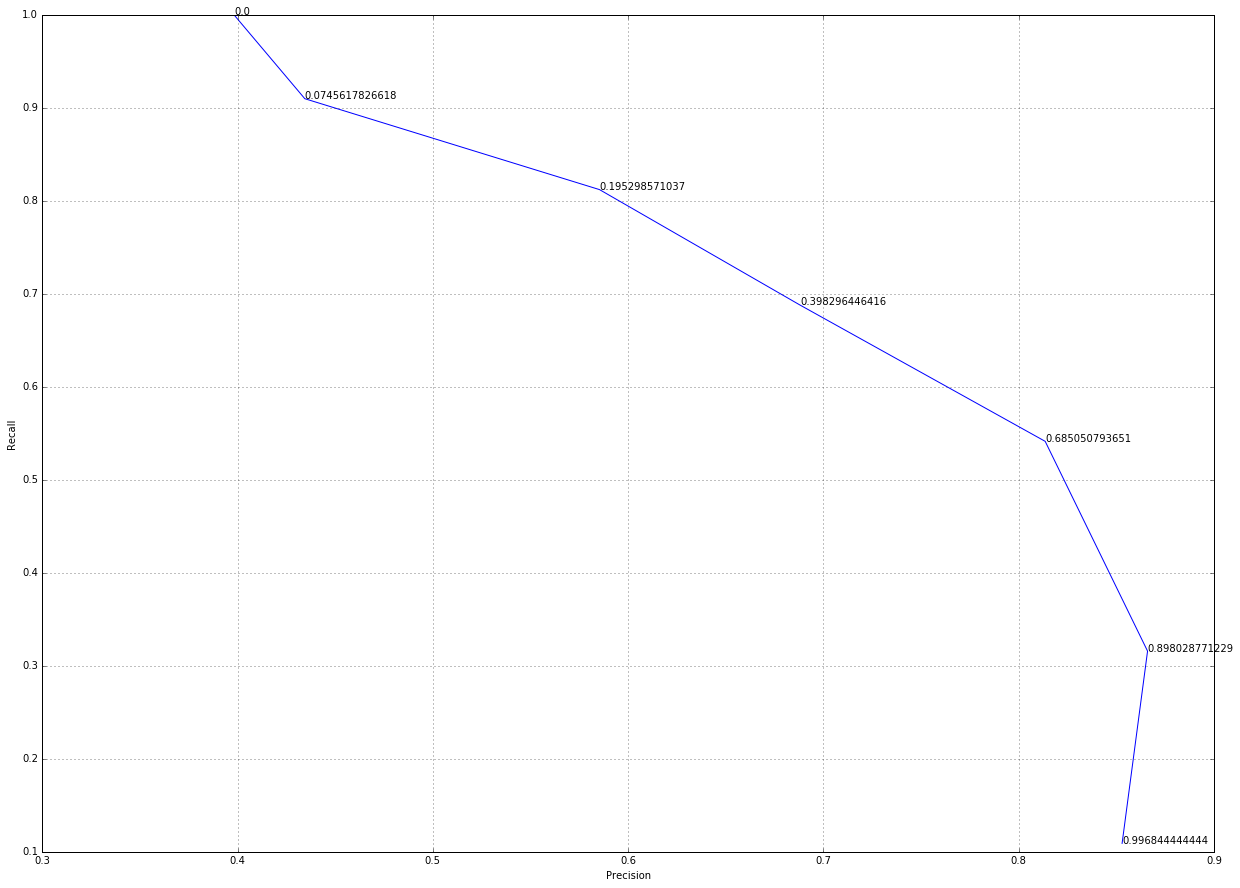

In [186]:
#The precision_recall plot
figure=plt.figure(1,figsize=(21,15))
l=precision.shape[0]
ax=figure.add_subplot(111)
precision_plot=precision[0:l:50]
recall_plot=recall[0:l:50]

thresholds_plot=thresholds[0:l:50]
ax.plot(precision_plot,recall_plot)
for k in range(len(thresholds_plot)):
    ax.annotate(thresholds_plot[k],(precision_plot[k],recall_plot[k]))
plt.xlabel('Precision')
plt.ylabel('Recall')
ax.grid()
figure.savefig('precision_recall_curve.png')

In [187]:
predicts_probs=rf.predict_proba(train[columns].values)
predictions=[]
for prob in predicts_probs[:,1]:
    if prob>0.68505:
        predictions.append(1)
    else:
        predictions.append(0)

In [188]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,train["Survived"].values)

0.82379349046015715

In [189]:
#Let's try it on the test set
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [190]:
test.loc[test["Age"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
39,931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
41,933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
58,950,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S


In [191]:
test.loc[test["Age"].isnull(),"Age"]=test["Age"].median()

In [192]:
test.loc[test["Fare"].isnull(),"Fare"]=test["Fare"].median()



In [198]:
#Predicting on this test set
test["Sex"]=test["Sex"].map({'female':0,'male':1})
test["Embarked"]=test["Embarked"].map({None:0,'C':1,'S':2,'Q':3})
titles=[]
surnames=[]
for every in test.Name:
    surnames.append(every.split(',')[0])
    name=every.split(',')[1]
    tits=name.split()
    titles.append(tits[0][:-1])
test["Title"]=titles
test["Surname"]=surnames
test["IsMother"]=np.zeros(test.shape[0])
test.loc[((test["Title"]=="Mrs.")&(test["Parch"]>0)),"IsMother"]=1
test["IsChild"]=np.zeros(test.shape[0])
test.loc[(test["Age"]<=18),"IsChild"]=1
test["IsOld"]=np.zeros(test.shape[0])
test.loc[(test["Age"]>=60),"IsOld"]=1
test["IsFirstClass"]=np.zeros(test.shape[0])
test.loc[(test["Pclass"]==1),"IsFirstClass"]=1
test["IsFamily"]=np.zeros(test.shape[0])
test.loc[(test["SibSp"]+test["Parch"]>0),"IsFamily"]=1
test["FamilySize"]=test["SibSp"]+test["Parch"]
test["TitleSplit"]=test["Title"]
test.loc[((test["TitleSplit"]=="Mme") | (test["TitleSplit"]=="Mlle")),"TitleSplit"]="Mlle"

test.loc[((test["Title"]=="Sir" ) | (test["Title"]=="Don")  | (test["Title"]=="Capt") | (test["Title"]=="Major")),
          "TitleSplit"]="Sir"
test.loc[((test["Title"]=="Dona") | (test["Title"]=="Lady") | (test["Title"]=="th") | (test["Title"]=="Jonkheer")),
          "TrainSplit"]="Lady"
ticket=[]
test["TitleSplit"]=pd.get_dummies(test["TitleSplit"])

for every in test['Ticket']:
    
    deptName = re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", every)
    if len(deptName) == 0:
        deptName = 'none'
    deptCode = ord(deptName[0]) + len(deptName)
    ticket.append(deptCode)
test["Dept"]=ticket
hashedtitle=[]
for i in range(test.shape[0]):
    ht=ord(test['Title'][i][0])+len(test['Title'][i])+test['Sex'][i]
    hashedtitle.append(ht)
test["hashedTitle"]=hashedtitle
test["FamilySize"]=test["SibSp"]+test["Parch"]+1
test["Familyid"]=test["FamilySize"].astype(str)+test["Surname"]
test.loc[test["FamilySize"]<=2,"Familyid"]="Small"
test["Familyid"]=pd.get_dummies(test["Familyid"])
test.Cabin.fillna('0', inplace=True)
test.loc[test.Cabin.str[0] == 'A', 'Cabin'] = 1
test.loc[test.Cabin.str[0] == 'B', 'Cabin'] = 2
test.loc[test.Cabin.str[0] == 'C', 'Cabin'] = 3
test.loc[test.Cabin.str[0] == 'D', 'Cabin'] = 4
test.loc[test.Cabin.str[0] == 'E', 'Cabin'] = 5
test.loc[test.Cabin.str[0] == 'F', 'Cabin'] = 6
test.loc[test.Cabin.str[0] == 'G', 'Cabin'] = 7
test.loc[test.Cabin.str[0] == 'T', 'Cabin'] = 8
test["IsFemale"]=np.zeros(test.shape[0])
test["IsThirdClass"]=np.zeros(test.shape[0])
test.loc[test["Sex"]==0,"IsFemale"]=1
test.loc[test["Pclass"]==3,"IsThirdClass"]=1
test["EmbarkedatS"]=np.zeros(test.shape[0])
test.loc[test["Embarked"]==2,"EmbarkedatS"]=1
test["EmbarkedatP"]=np.zeros(test.shape[0])
test.loc[test["Embarked"]==1,"EmbarkedatP"]=1
test["EmbarkedatQ"]=np.zeros(test.shape[0])
test.loc[test["Embarked"]==3,"EmbarkedatQ"]=1
tr=train[columns]
rf.fit(tr.values,train["Survived"].values)




#test["Survived"]=rf.predict(test[columns].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [197]:
test["Survived"]=rf.predict(test[columns].values)
results=test[["PassengerId","Survived"]]
results.to_csv('Results.csv')

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').